In [1]:
from ingestion.ingest_raw import load_single_csv

REGION = 'PJME'

df = load_single_csv(f"data/raw/{REGION}_hourly.csv")
df.head()

PJME


,timestamp,load_mw,region
0,2002-12-31 01:00:00,26498.0,PJME
1,2002-12-31 02:00:00,25147.0,PJME
2,2002-12-31 03:00:00,24574.0,PJME
3,2002-12-31 04:00:00,24393.0,PJME
4,2002-12-31 05:00:00,24860.0,PJME


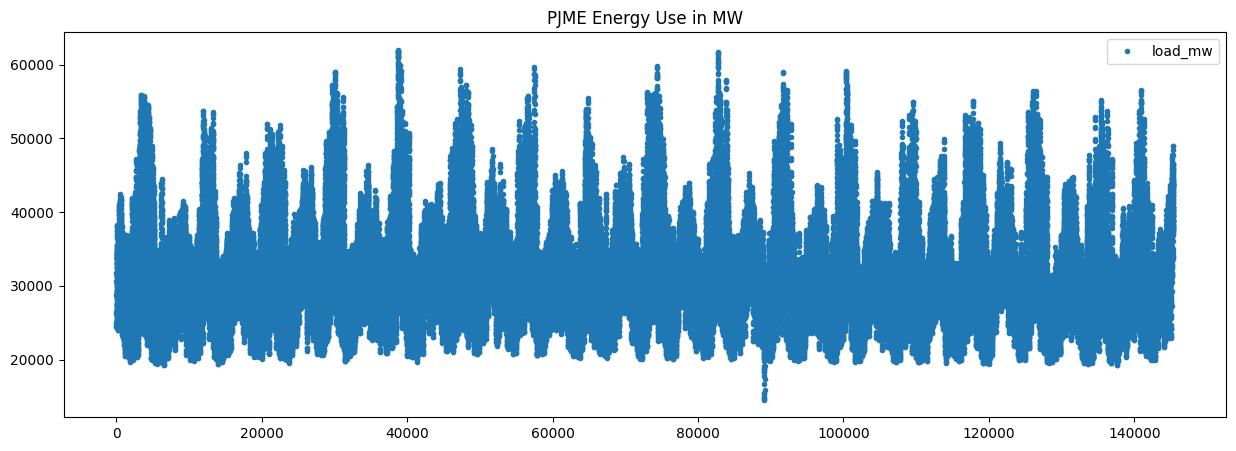

In [2]:
import matplotlib.pyplot as plt

df.plot(style='.',
        figsize=(15, 5),
        title='PJME Energy Use in MW')
plt.show()

In [3]:
from sklearn.model_selection import TimeSeriesSplit
# we have hourly energy consumption and lets assume we want to predict out into  one year ahead into future ,test_size = 24 hours x 365 days x 1 year
tss= TimeSeriesSplit(n_splits=5 ,test_size =24*365*1, gap=24)#gap between the training and validation set you're splitting on each time ,gap =24 hours 
#important to sort dataframe , otherwise timeseriesplit will not work 
df=df.sort_index()

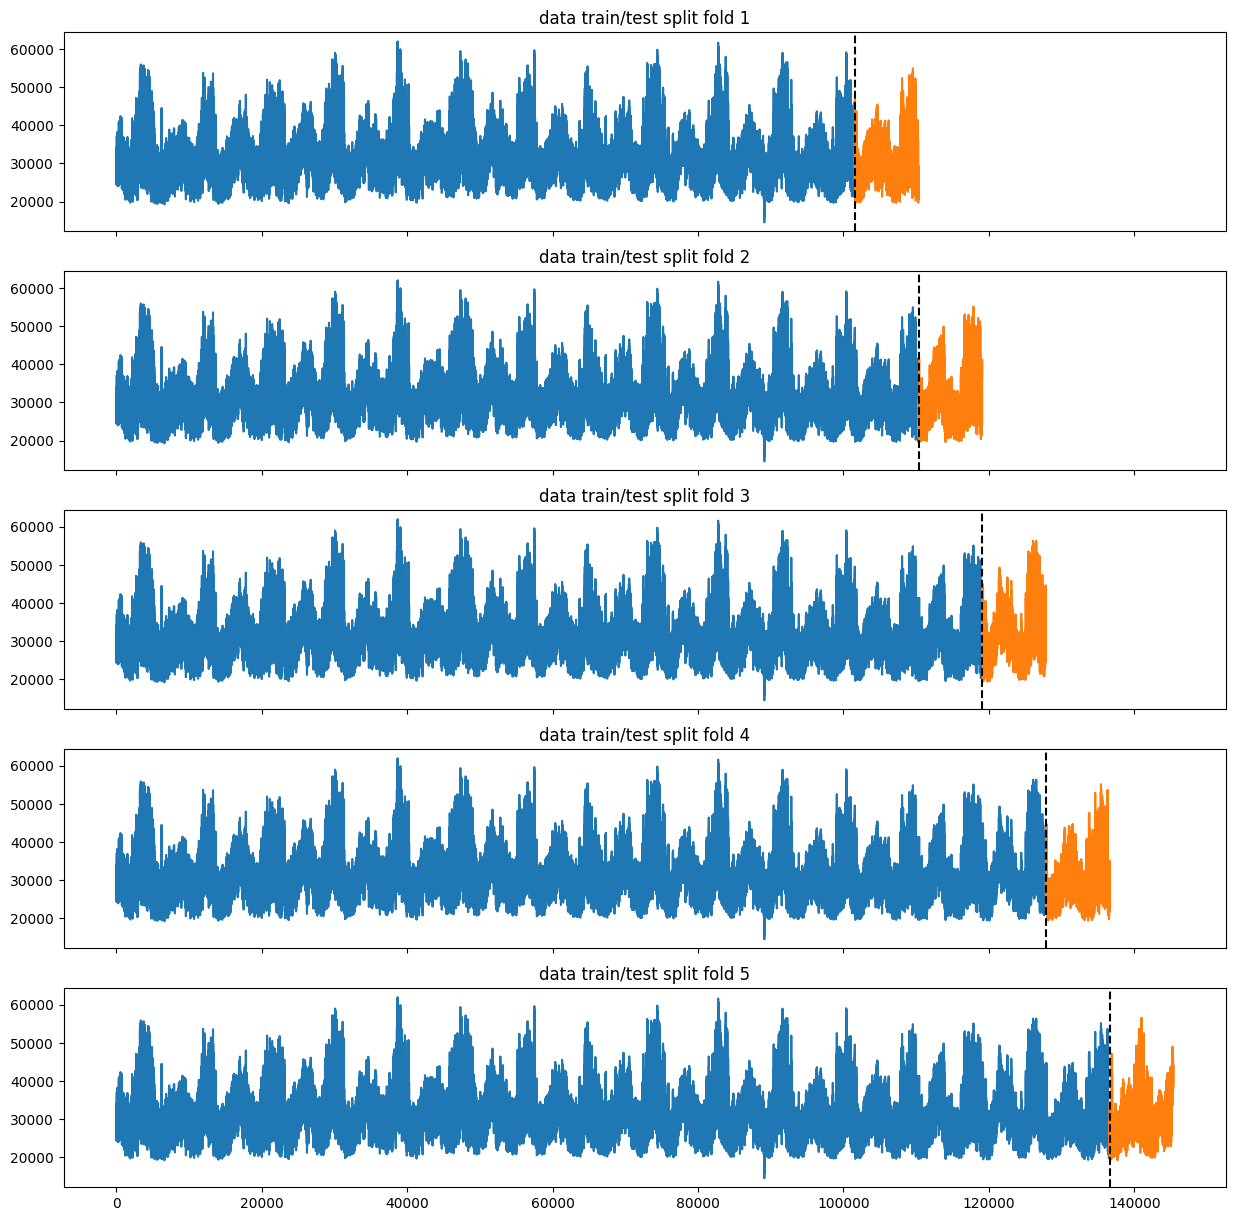

In [4]:

fig, axs = plt.subplots(5,1,figsize=(15,15),sharex=True)
fold =0
for train_idx, val_idx in tss.split(df):
    train=df.iloc[train_idx]
    test=df.iloc[val_idx]

    train['load_mw'].plot(ax=axs[fold],
                          label='training set',
                          title=f'data train/test split fold {fold+1}')
    
    test['load_mw'].plot(ax=axs[fold],
                         label='test set')
    axs[fold].axvline(test.index.min(),color='black',ls='--')
    fold += 1
plt.show()    

In [8]:
#importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_absolute_error
color_pal=sns.color_palette()
plt.style.use('fivethirtyeight')

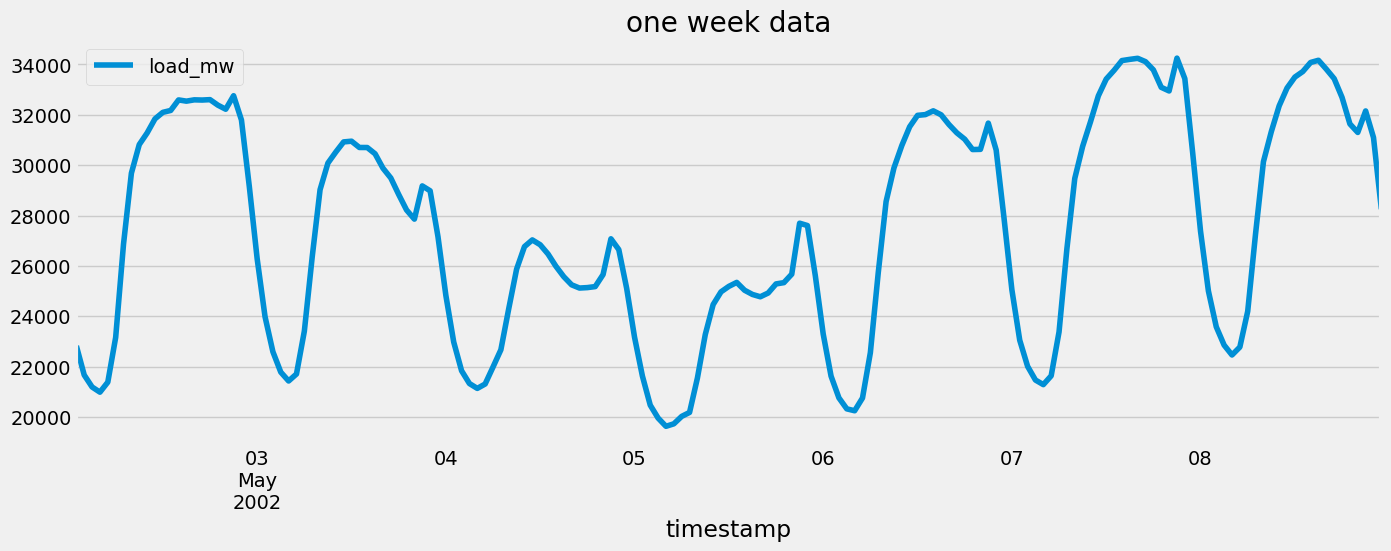

In [10]:
import pandas as pd
df=df.set_index('timestamp')
df.index=pd.to_datetime(df.index)
df=df.sort_index()
df.loc[(df.index>'2002-05-02')&(df.index<'2002-05-09')].plot(figsize=(15,5),title="one week data")
plt.show()